# **Loan Default Risk with Business Cost Optimization** 

**Author**: Yasmeen Rafique | Data Analytics Enthusiast  
📅 August 2025 | 📍 Pakistan

### **Introduction**
  
The goal is not only to build accurate classification models but also to **optimize the decision threshold** based on a **cost-benefit analysis**.  

By incorporating business cost values for false positives (granting risky loans) and false negatives (rejecting safe customers), the project aims to minimize the **total business cost** while improving risk assessment.

#### **Understanding and Loading Dataset**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv("HC_application_train.csv")
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Model Training and Testing**

In [5]:
# Drop columns with too many missing values
df = df.dropna(thresh=len(df)*0.5, axis=1)

# Fill missing with median
df = df.fillna(df.median(numeric_only=True))

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Target variable
y = df["TARGET"]
X = df.drop("TARGET", axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get probabilities
y_probs = model.predict_proba(X_test)[:,1]


#### **Business cost**

In [7]:
cost_fn = 5000
cost_fp = 1000


In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

costs = []
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    costs.append(total_cost)

# Best threshold
best_idx = np.argmin(costs)
best_threshold = thresholds[best_idx]
print("Best Threshold:", best_threshold)
print("Minimum Business Cost:", costs[best_idx])


Best Threshold: 0.1480696702774087
Minimum Business Cost: 32386000


#### **Graph Analysis**

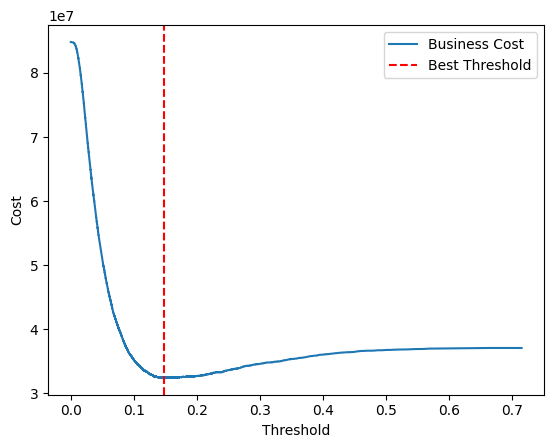

In [9]:
plt.plot(thresholds, costs, label="Business Cost")
plt.axvline(best_threshold, color='red', linestyle='--', label="Best Threshold")
plt.xlabel("Threshold")
plt.ylabel("Cost")
plt.legend()
plt.show()


#### **Testing**

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix


y_pred = model.predict(X_test)  

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Define business costs
cost_fp = 1000
cost_fn = 5000

# Calculate total business cost
total_cost = (fp * cost_fp) + (fn * cost_fn)

print("False Positives:", fp)
print("False Negatives:", fn)
print("Total Business Cost: $", total_cost)


Confusion Matrix:
[[84727   114]
 [ 7325    88]]
False Positives: 114
False Negatives: 7325
Total Business Cost: $ 36739000


### 🙋‍♀️ About Me

I'm Yasmeen Rafique, a Data Analytics passionate about storytelling with data, automation, and building impactful things in data field.  
Connect with me on [LinkedIn](www.linkedin.com/in/yasmeen-rafique) or check out more projects on [GitHub](https://github.com/Yasmeenrafique).